# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import floor

if not os.path.exists("ainvert.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/ainvert.py --no-check-certificate

parrot = cv2.imread('parrot.bmp')           # Read image
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY) # Convert to RGB

from ainvert import A_invert

In [2]:
print(A_invert)

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [-3  3  0  0 -2 -1  0  0  0  0  0  0  0  0  0  0]
 [ 2 -2  0  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 -3  3  0  0 -2 -1  0  0]
 [ 0  0  0  0  0  0  0  0  2 -2  0  0  1  1  0  0]
 [-3  0  3  0  0  0  0  0 -2  0 -1  0  0  0  0  0]
 [ 0  0  0  0 -3  0  3  0  0  0  0  0 -2  0 -1  0]
 [ 9 -9 -9  9  6  3 -6 -3  6 -6  3 -3  4  2  2  1]
 [-6  6  6 -6 -3 -3  3  3 -4  4 -2  2 -2 -2 -1 -1]
 [ 2  0 -2  0  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  0 -2  0  0  0  0  0  1  0  1  0]
 [-6  6  6 -6 -4 -2  4  2 -3  3 -3  3 -2 -1 -2 -1]
 [ 4 -4 -4  4  2  2 -2 -2  2 -2  2 -2  1  1  1  1]]


In [3]:
def cubic_interpolate(image, scale):
    scale_width, scale_height = scale
    height, width = image.shape
    
    new_width, new_height = round(scale_width*width), round(scale_height*height)
    new_image = np.zeros((new_height, new_width))
    
    def get_derivatives(i, j):
        pre_i = i - 1 if i > 0 else 0
        post_i = i + 1 if i < width-1 else width-1
        
        pre_j = j - 1 if j > 0 else 0
        post_j = j + 1 if j < height-1 else height-1
        
        X = (image[j, post_i].astype(int) - image[j, pre_i].astype(int)) / 2
        Y = (image[post_j, i].astype(int) - image[pre_j, i].astype(int)) / 2
        XY = (image[post_j, post_i].astype(int) - image[pre_j, i].astype(int) - image[j, pre_i].astype(int) + image[j, i].astype(int)) / 4
        
        return X, Y, XY
    
    for i in range(new_width):
        for j in range(new_height):
            i1 = floor(i/scale_width)
            j1 = floor(j/scale_height)
            
            i2 = i1 + 1 if i1 < width - 1 else i1
            j2 = j1 + 1 if j1 < height - 1 else j1
            
            A = image[j1, i1]
            B = image[j2, i1]
            C = image[j2, i2]
            D = image[j1, i2]
            
            A_x, A_y, A_xy = get_derivatives(i1, j1)
            B_x, B_y, B_xy = get_derivatives(i1, j2)
            C_x, C_y, C_xy = get_derivatives(i2, j2)
            D_x, D_y, D_xy = get_derivatives(j1, i2)
            
            x = np.array([[A, B, D, C, A_x, B_x, D_x, C_x, A_y, B_y, D_y, C_y, A_xy, B_xy, D_xy, C_xy]]).T
            
            a = A_invert @ x
            
            dist_i = i/scale_width - i1
            dist_j = j/scale_height - j1
            
            for m in range(4):
                for n in range(4):
                    new_image[j, i] += a[4*m + n] * dist_i**m * dist_j**n
    
    return new_image

In [4]:
def show_image(image, scale=100):
    plt.figure(figsize=(image.shape[0]/scale, image.shape[1]/scale), dpi=200)
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.gray()
    plt.show()

(1, 1)


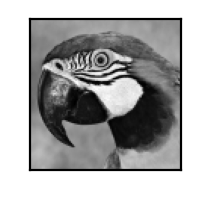

-----

(1.5, 1.5)


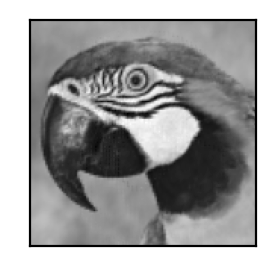

-----

(2.5, 2.5)


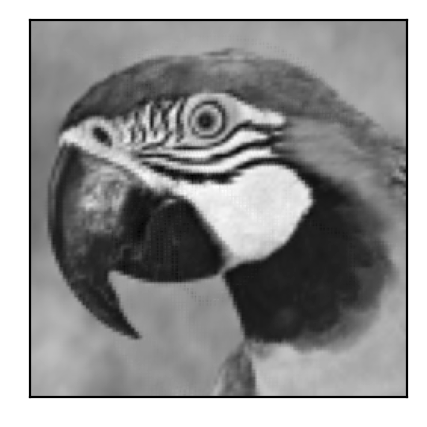

-----

(1.5, 2.5)


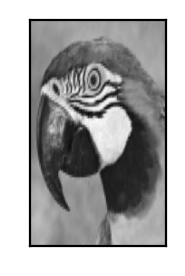

-----

(0.5, 0.5)


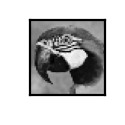

-----



In [5]:
scales = [(1, 1),
         (1.5, 1.5), 
         (2.5, 2.5), 
         (1.5, 2.5), 
         (0.5, 0.5)]

for scale in scales:
    print(scale)
    show_image(cubic_interpolate(parrot, scale))
    print('-----\n')

Metoda interpolacji dwusześcienna wymaga znacznie większej liczby operacji niż interpolacja dwuliniowa, gdyż wymaga obliczenia pochodnych oraz rozważania 16 punktów (w porównaniu do 4). Zwiększenie czasu działania algorytmu można było zauważyć nawet dla stosunkowo niewielkich rozmiarów przeskalowanych obrazów.